# Lists and Iterators

## Arrays

Arrays are perhaps the most basic of data structures. 

Values are stored in contiguous slots in memory.

How does the compiler access a value in an array? Is it an expensive or efficient operation?

How do you add an item to an array?

How do you retrieve an item?

How do you keep track of the number of items you have?

How do you remove an item?

### Approach #1

How do you add an item to an array?
- you can create a new array each time, and copy the items over

How do you retrieve an item?
- index

How do you keep track of the number of items you have?
- the size of the array

How do you remove an item?
- create a new array, and only copy the stuff you want to keep

<div class='big centered'> 🤨 </div>

What issues do you see with this strategy?

### Approach #2

- Keep a big array around. 
- Keep your own counter of the number of items in it.

How do you add an item to an array?
- Add new items to the last empty slot in the array.

How do you retrieve an item?
- index

How do you keep track of the number of items you have?
- the counter

How do you remove an item?
- remove the item, shift all the items at larger index down.


What if you run out of space in your backing array?
- At that point we would have to create a new (bigger) array and copy things over
- While this involves a lot of copying, it doesn't happen very often, so maybe that's OK?

This (approach #2) is a valid strategy.

It CAN be used correctly.

Is it possible to use it incorrectly? 

## Vectors

The C++ `vector` is a class that wraps an array!

It's purpose is to make the array-storage strategy more fool-proof.

You don't need to worry about the counter, the shifting, copying, growing, etc. 

`vector` already implemented all that stuff. It's well tested. Now you just get to use it.

In [1]:
using namespace std;
#include <string>
#include <iostream>

In [2]:
#include <vector>

In [3]:
vector<string> stuff;

Adding stuff at the end is quick

In [4]:
stuff.push_back("foo");
stuff.push_back("bar");

In [5]:
stuff

{ "foo", "bar" }

In [6]:
stuff.push_back("baz");
stuff

{ "foo", "bar", "baz" }

Accessing items by index is quick

In [7]:
stuff[0]

"foo"

In [8]:
stuff[2]

"baz"

What happens when you want to insert a value at the beginning, or in the middle?

In [9]:
stuff

{ "foo", "bar", "baz" }

In [10]:
stuff.insert(stuff.begin() + 1, "quux");
stuff

{ "foo", "quux", "bar", "baz" }

You can't magically create new memory slots in the middle; you have to shift "bar" and "baz".

For a vector with many values, that's not great...

What about if you want to remove a value from the beginning or middle?

In [11]:
stuff.erase(stuff.begin());
stuff

{ "quux", "bar", "baz" }

What if you want to remove a value from the back?

In [12]:
stuff.pop_back()

In [13]:
stuff

{ "quux", "bar" }

### Vectors - Summary

- Adding or removing from the back is very quick
  - Assign the value and increment a counter
  - Sometimes you'll need to grow the array, but when you average that time across all the items you add, it's very tractable
  
- Adding or removing from the front or middle is expensive
  - All the items further down need to be shifted to make or fill the space.
  
- Accessing items is efficient
  - Simply index the item

Would a vector be a good choice for implementing a stack?

Would a vector be a good choice for implementing a queue?

How could I implement a data structure that permits efficient add/remove in the front or middle?

## Linked List

Instead of using an array to store the values, let's try a whole new approach

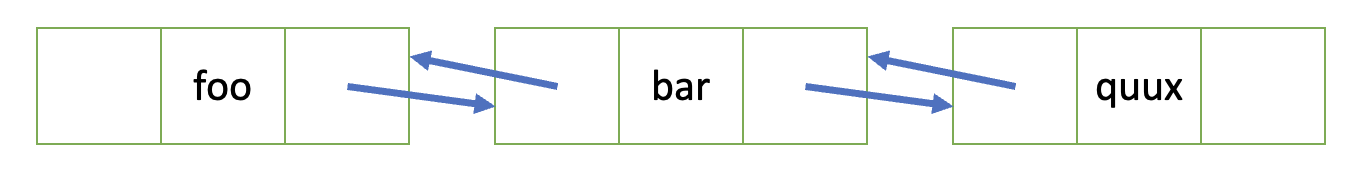

- Linked lists use special containers call "nodes" to store the contents of the list
- Each node tracks one item and the next and previous nodes in the list.
- The list keeps track of the number of items and the first and last nodes in the chain.

### How do we add a new item?

Create the node that stores the item.

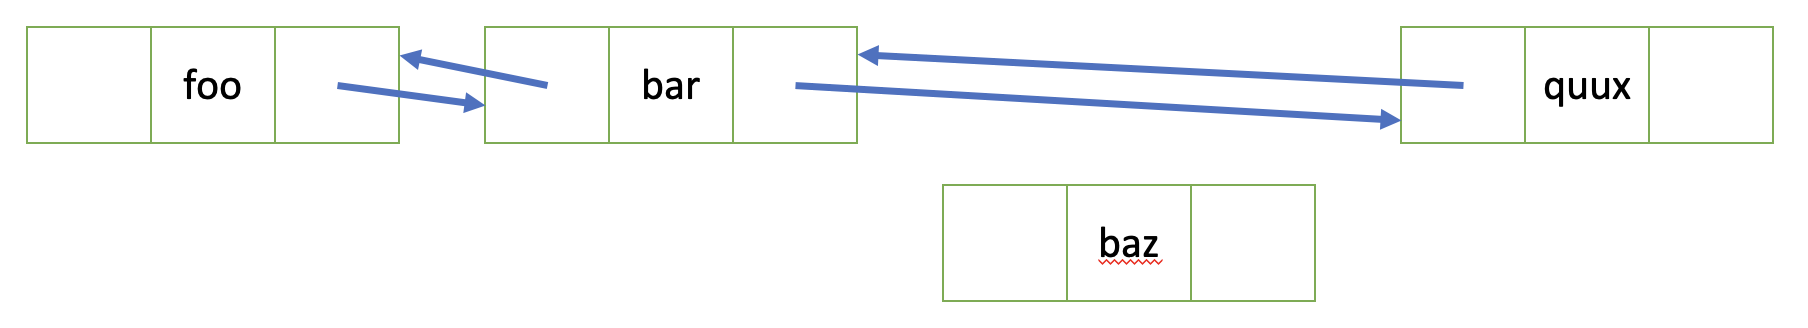

Point that node to its new neighbors.

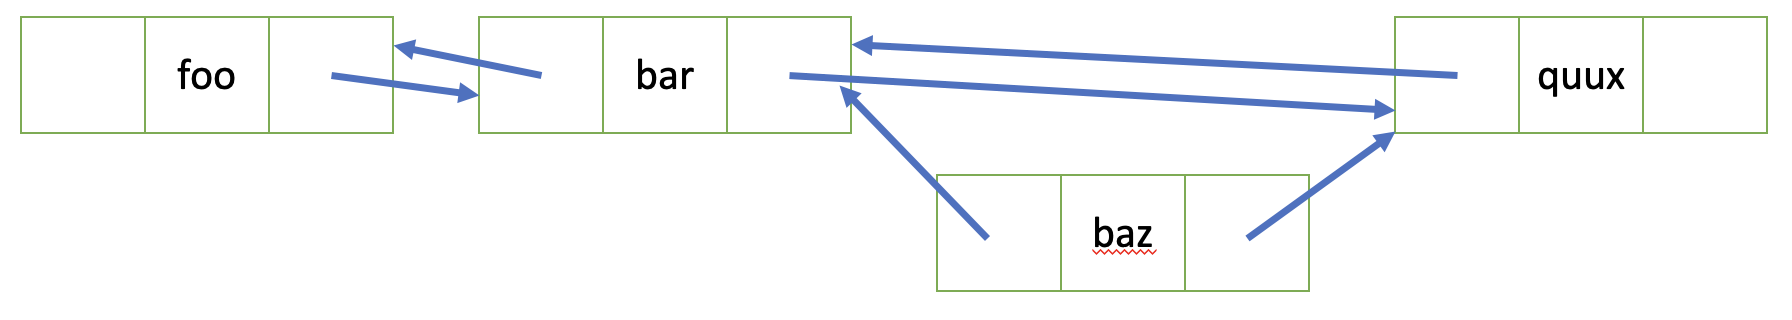

Point the neighbors to the new node.

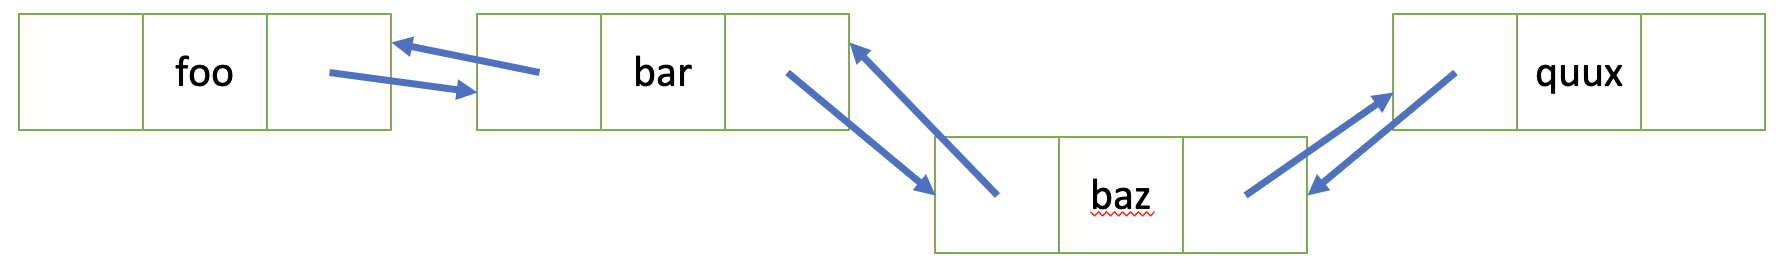

### How do we remove an item 

For example, "bar"

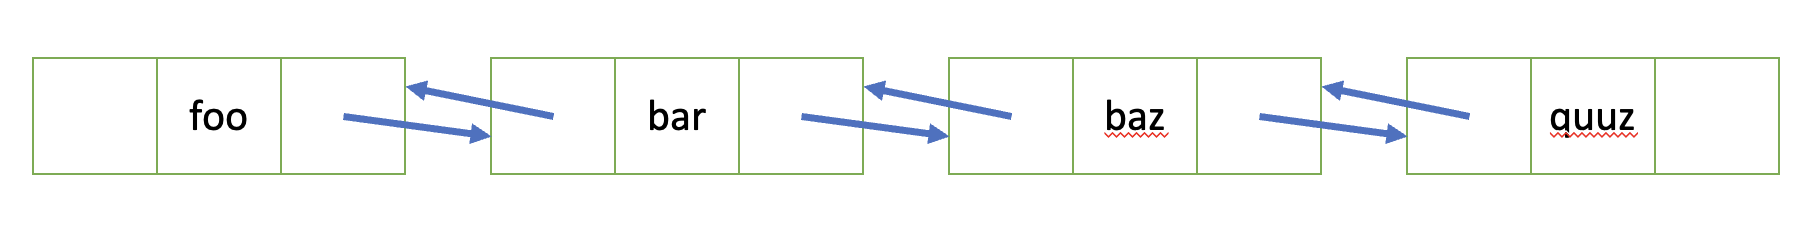

Point the neighbors to each other.

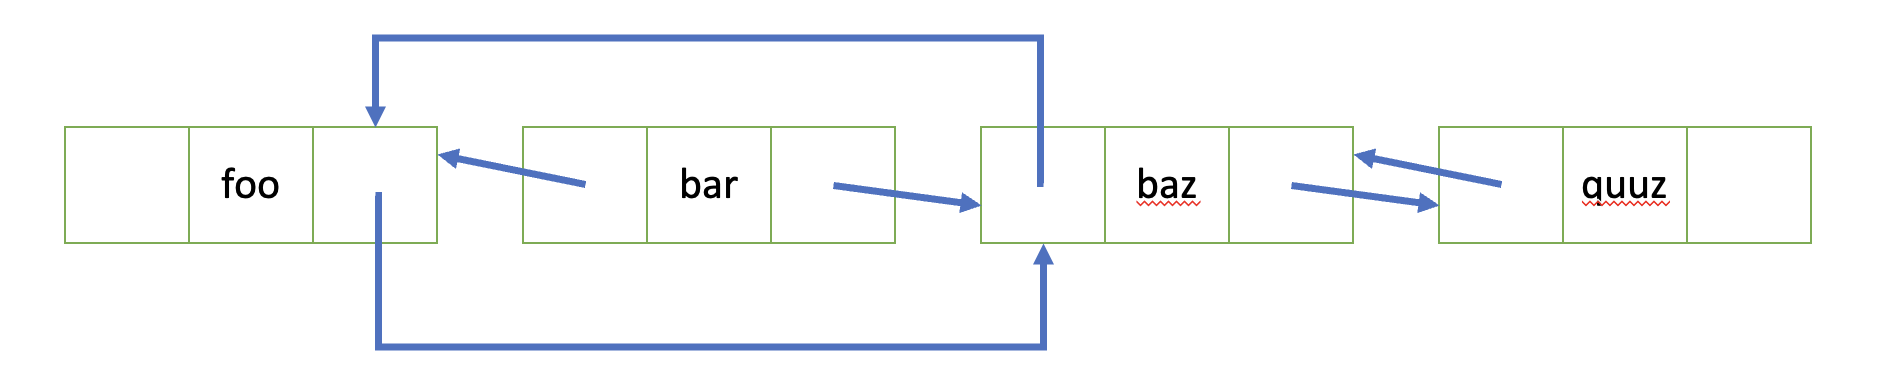

Delete the node

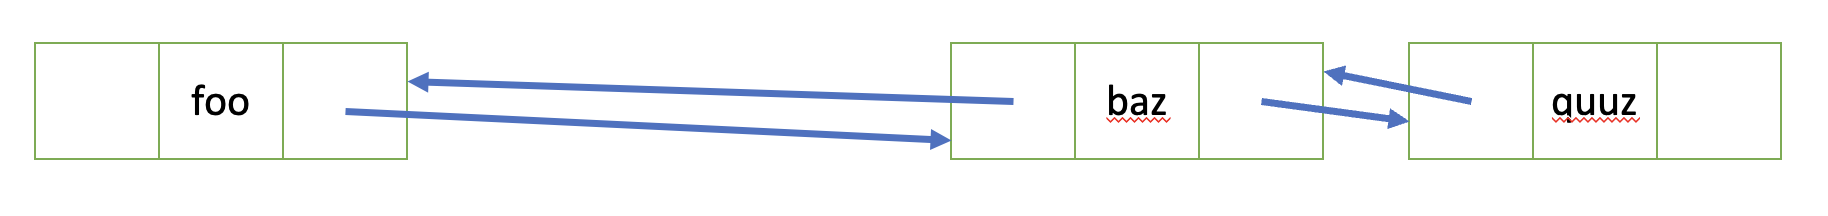

We'll talk about what linked list implementation code looks like later. 

C++ provides a linked list for you: `list`

https://en.cppreference.com/w/cpp/container/list

In [3]:
#include <list>

In [15]:
list<string> names;

names.push_back("Nephi");
names.push_front("Moroni");
names.push_back("Pahoran");
names.push_front("Mormon");
names.push_back("Ether");

names

{ "Mormon", "Moroni", "Nephi", "Pahoran", "Ether" }

In [16]:
names.pop_back();
names.pop_front();
names

{ "Moroni", "Nephi", "Pahoran" }

In [17]:
names.front()

"Moroni"

In [18]:
names.back()

"Pahoran"

How do I get to "Nephi"?

In [19]:
names[1]

input_line_40:2:7: error: type 'list<std::string>' (aka 'list<basic_string<char> >') does not provide a subscript operator
 names[1]
 ~~~~~^~


Interpreter Error: 

- Linked lists have efficient add and remove from the front and back
- If you have a pointer to an element in the middle, it can be quick to add and remove at that location also
  - How do we get a pointer to an element in the middle?
- Do linked lists support random access (i.e. indexing)?

Can you use a linked list to implement a stack?

Can you use a linked list to implement a queue?

- Vectors are good for add/remove at the end and provide random access.
  - They are not good for add/remove anywhere else.
  
  
- Linked lists are good for add/remove anywhere.
  - They do not provide efficient random access.
  

Can I have my cake and eat it too?

<div class='big centered'> 🍰 😋 </div>

## Deques

- "Deque" stands for "Double-ended Queue"
- It's like a double-ended vector, but it uses multiple arrays under the hood
- The arrays support random access
- Multiple arrays allow the deque to grow in both directions
- BUT...because they are arrays, adding/removing in the middle still requires a shift.

C++ provides an implementation for you: `deque`

(Found in the `queue` library)

https://en.cppreference.com/w/cpp/container/deque

In [4]:
#include <queue>

In [21]:
deque<string> names;


names.push_back("Nephi");
names.push_front("Moroni");
names.push_back("Pahoran");
names.push_front("Mormon");
names.push_back("Ether");

names

{ "Mormon", "Moroni", "Nephi", "Pahoran", "Ether" }

In [22]:
names.pop_back();
names.pop_front();
names

{ "Moroni", "Nephi", "Pahoran" }

In [23]:
names.front()

"Moroni"

In [24]:
names.back()

"Pahoran"

In [25]:
names[1]

"Nephi"

Random access!

<div class='big centered'> 💪🏻 </div>

Can you implement a stack with a deque?

Can you implement a queue with a deque?

## Benchmarks

### Adding numbers to the collection

In [26]:
%%timeit
vector<int> numbers;
for (int i = 0; i < 1000; i++) {
    numbers.push_back(i);
}

6.06 us +- 17 ns per loop (mean +- std. dev. of 7 runs 100000 loops each)


In [27]:
%%timeit
list<int> numbers;
for (int i = 0; i < 1000; i++) {
    numbers.push_back(i);
}

47.3 us +- 487 ns per loop (mean +- std. dev. of 7 runs 10000 loops each)


In [28]:
%%timeit
deque<int> numbers;
for (int i = 0; i < 1000; i++) {
    numbers.push_back(i);
}

6.03 us +- 9.82 ns per loop (mean +- std. dev. of 7 runs 100000 loops each)


### Removing numbers from the collection

In [29]:
vector<int> numbers;
for (int i = 0; i < 10000000; i++) {
    numbers.push_back(i);
}

In [30]:
%%timeit -n 1000
numbers.erase(numbers.begin());

1.34 ms +- 89.6 us per loop (mean +- std. dev. of 7 runs 1000 loops each)


In [31]:
list<int> numbers;
for (int i = 0; i < 10000000; i++) {
    numbers.push_back(i);
}

In [32]:
%%timeit -n 1000
numbers.pop_front();

248 ns +- 267 ns per loop (mean +- std. dev. of 7 runs 1000 loops each)


In [33]:
deque<int> numbers;
for (int i = 0; i < 10000000; i++) {
    numbers.push_back(i);
}

In [34]:
%%timeit -n 1000
numbers.pop_front();

6.77 ns +- 1.74 ns per loop (mean +- std. dev. of 7 runs 1000 loops each)


## Getting the "nth" element

In [35]:
vector<int> numbers;
for (int i = 0; i < 10000000; i++) {
    numbers.push_back(i);
}

In [36]:
%%timeit
numbers[10000];

1.36 ns +- 0.0124 ns per loop (mean +- std. dev. of 7 runs 1000000000 loops each)


Linked lists don't have a random access operator...

In [37]:
list<int> numbers;
for (int i = 0; i < 10000000; i++) {
    numbers.push_back(i);
}

In [38]:
%%timeit
int n = 10000;
int i = 0;
int found;
for (int const& item : numbers) {
    if (i == n) {
        found = item;
        break;
    }
    i++;
}

76.9 us +- 899 ns per loop (mean +- std. dev. of 7 runs 10000 loops each)


In [39]:
deque<int> numbers;
for (int i = 0; i < 10000000; i++) {
    numbers.push_back(i);
}

In [40]:
%%timeit
numbers[10000];

21.5 ns +- 0.14 ns per loop (mean +- std. dev. of 7 runs 10000000 loops each)


## Vectors, Lists, and Deques 
- Vectors
  - Simple, most efficient in time and storage
  - Good at add/remove at end
  - Random access
  - Don't add/remove well in front or middle
- Linked lists
  - Good at add/remove ANYWHERE
  - But don't have random access, so getting anywhere but the first or last element takes effort
- Deques
  - Good at add/remove at front or back
  - Random access
  - Don't add/remove well in the middle
  - Slightly more overhead/bookkeeping than vectors

## Iterators

When you want to iterate over a vector, you use an index.

When you want to iterate over a list, you follow `next` and `previous` pointers.

But the concept of iterating over the contents of a collection is a fairly universal concept.

**iterators** provide a C++ abstraction for the concept of container iteration.

In [6]:
vector<string> words;
words.push_back("abacus");
words.push_back("benediction");
words.push_back("cartesian");

for (vector<string>::iterator it = words.begin(); it != words.end(); ++it) {
    cout << *it << endl;
}

abacus
cartesian
abacus
benediction
cartesian


In [ ]:
// Iterators can be outside a loop
vector<string>::iterator it = words.begin();
cout << *it << endl;
it = it + 2;
cout << *it << endl;



In [7]:
list<string> words;
words.push_back("abacus");
words.push_back("benediction");
words.push_back("cartesian");

for (list<string>::iterator it = words.begin(); it != words.end(); ++it) {
    cout << *it << endl;
}

abacus
benediction
cartesian


In [5]:
deque<string> words;
words.push_back("abacus");
words.push_back("benediction");
words.push_back("cartesian");

for (auto it = words.begin(); it != words.end(); it++) {
    cout << *it << endl;
}

words.insert(words.begin() + 1, "foo");

words

abacus
benediction
cartesian


{ "abacus", "foo", "benediction", "cartesian" }


Many containers now depend on iterators for finding elements, inserting elements, removing elements, etc.

In fact, this pattern is so useful for iterating over items in a collection, C++ has made it even easier to use.

(Thank you Python for setting the standard...)

In [6]:
list<string> words;
words.push_back("abacus");
words.push_back("benediction");
words.push_back("cartesian");

for (string item : words) {
    cout << item << endl;
}

abacus
benediction
cartesian


In [6]:
#include <string>
#include <iostream>
#include <list>
using namespace std;

In [8]:
string foo = "789980";
for (const auto& c : foo) {
    cout << c << endl;
}

7
8
9
9
8
0


In [7]:
list<string> words;
words.push_back("abacus");
words.push_back("benediction");
words.push_back("cartesian");

for (const string& item : words) {
    cout << item << endl;
}


abacus
benediction
cartesian


## Why const vs copy?

In [9]:
vector<string> strings;
for (int i = 0; i < 10000000; i++) {
    strings.push_back("some string some string some string some string some string some string some string some string");
}

In [10]:
%%timeit
for (auto i : strings) {
    i;
}

194 ms +- 2.16 ms per loop (mean +- std. dev. of 7 runs 1 loop each)


In [13]:
%%timeit
for (const auto& i : strings) {
    i;
}

51.1 ms +- 661 us per loop (mean +- std. dev. of 7 runs 10 loops each)
